# Câu hỏi: Xu hướng về sự đa dạng hóa nội dung quốc tế và nội dung nội địa của Netflix là gì?

**Lợi ích:**
   - Giúp phân tích sự thay đổi trong chiến lược nội dung quốc tế của Netflix, bao gồm sự gia tăng nội dung từ các quốc gia khác ngoài Mỹ.
   - Điều này giúp nhận diện các xu hướng toàn cầu và nhận xét về việc Netflix đang mở rộng ra thị trường quốc tế như thế nào.

**Cách làm:**
   - Phân tích tỷ lệ nội dung quốc tế và nội dung từ Mỹ qua các năm.
   - Xác định các quốc gia có sự gia tăng đáng kể về sản lượng nội dung trên Netflix (country).
   - Vẽ biểu đồ phân chia tỷ lệ nội dung quốc tế và nội dung nội địa theo từng năm.

---

## Mục lục

- A. [Tiền xử lý](#tien-xu-ly)
- B. [Phân tích](#phan-tich)
    - 1. [Sự đa dạng về số lượng nội dung nội địa và quốc tế được thêm vào Netflix qua các năm](#su-da-dang-ve-so-luong-noi-dung-noi-dia-va-quoc-te-duoc-them-vao-netflix-qua-cac-nam)
        - 1.1. [Sự đa dạng về số lượng nội dung nội địa và quốc tế qua các năm](#su-da-dang-ve-so-luong-noi-dung-noi-dia-va-quoc-te-qua-cac-nam)
        - 1.2. [Sự đa dạng hoá nội dung được hợp tác sản xuất qua từng năm](#su-da-dang-hoa-noi-dung-duoc-hop-tac-san-xuat-qua-tung-nam)
    - 2. [Các quốc gia có sự gia tăng đáng kể về số lượng nội dung trên Netflix](#cac-quoc-gia-co-su-gia-tang-dang-ke-ve-so-luong-noi-dung-tren-netflix)
    - 3. [Trả lời câu hỏi](#tra-loi-cau-hoi)

---

### Các thư viện cần thiết:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Đọc file vào dataframe:

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('../data/netflix_titles_cleaned.csv', encoding='ISO-8859-1', skiprows= 0)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,season,duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,UNKNOWN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",NaN,90.0
1,TV Show,Blood & Water,UNKNOWN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,NaN
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UNKNOWN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,NaN
3,TV Show,Jailbirds New Orleans,UNKNOWN,UNKNOWN,UNKNOWN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,NaN
4,TV Show,Kota Factory,UNKNOWN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,NaN


## A. Tiền xử lý:

Bỏ những cột không cần thiết:

In [3]:
df = df.drop(columns = ['cast', 'rating', 'listed_in', 'description', 'season', 'duration'])

Theo quan sát dữ liệu, vẫn còn tồn tại 2 dòng có xuất hiện dấu ',' đầu dòng. Tiến hành chuẩn hoá chuỗi.

In [4]:
index = df[df['country'].isin([', South Korea', ', France, Algeria'])].sort_index()
country = index['country'].str.strip(', ')
index['country'] = country
df[df['country'].isin([', South Korea', ', France, Algeria'])] = index.copy()
df.loc[index.index, 'country']

193        South Korea
365    France, Algeria
Name: country, dtype: object

- Chuẩn hoá thành công.

One-Hot encoding cho cột `country` để phân tích quốc gia.

In [5]:
df['country'] = df['country'].str.replace(r',\s*$', '', regex=True)
# Chuyển đổi cột 'country' thành các giá trị one-hot encoding
listed_in_encoded = df['country'].str.split(', ', expand=True).stack()
# Tạo one-hot encoding cho các quốc gia
listed_in_encoded = pd.get_dummies(listed_in_encoded)
listed_in_encoded = listed_in_encoded.drop(columns='UNKNOWN')
# Gộp lại với DataFrame ban đầu
df = pd.concat([df, listed_in_encoded.groupby(level=0).sum()], axis=1)
# Kiểm tra kết quả
df.head()


,type,title,director,country,date_added,release_year,Afghanistan,Albania,Algeria,Angola,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,TV Show,Blood & Water,UNKNOWN,South Africa,2021-09-24,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TV Show,Ganglands,Julien Leclercq,UNKNOWN,2021-09-24,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TV Show,Jailbirds New Orleans,UNKNOWN,UNKNOWN,2021-09-24,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,Kota Factory,UNKNOWN,India,2021-09-24,2021,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## B. Phân tích:

### 1. Sự đa dạng về số lượng nội dung nội địa và quốc tế được thêm vào Netflix qua các năm:

#### 1.1. Sự đa dạng về số lượng nội dung nội địa và quốc tế qua các năm:

- Các bước thực hiện:
    - Bước 1: Tạo cột 'is_international' dựa trên one-hot encoding.
    - Bước 2: Phân tích tỷ lệ nội dung quốc tế và nội địa theo từng năm.
    - Bước 3: Vẽ biểu đồ phân chia tỷ lệ nội dung quốc tế và nội địa theo năm

In [6]:
# Kiểm tra từng dòng trong DataFrame để gán giá trị vào 'is_international'
df['is_international'] = df.apply(
    lambda row: 'Nội địa (Hoa Kỳ)' if (row['United States'] == 1 and row[list(listed_in_encoded.columns)].sum() == 1) else
               ('Quốc tế' if row['United States'] == 0 and row[list(listed_in_encoded.columns)].sum() > 0 else ('Không xác định' if row[list(listed_in_encoded.columns)].sum() == 0 else 'Hợp tác')),
    axis=1
)

# Chuyển 'date_added' thành kiểu datetime và thêm cột 'release_year'
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = df['date_added'].dt.year

# Đếm số lượng nội dung quốc tế và nội địa theo từng năm
content_distribution_by_year = df.groupby(['release_year', 'is_international']).size().unstack().fillna(0)

# Vì chưa tổng kết năm 2024 nên ta tạm bỏ qua trong phần tính số lượng này
content_distribution_by_year = content_distribution_by_year.drop(2024)

# In kết quả
print(content_distribution_by_year)


is_international  Hợp tác  Không xác định  Nội địa (Hoa Kỳ)  Quốc tế
release_year                                                        
2008                  0.0             0.0               2.0      0.0
2009                  0.0             0.0               1.0      1.0
2010                  0.0             0.0               1.0      0.0
2011                  1.0             0.0              11.0      1.0
2012                  1.0             0.0               2.0      0.0
2013                  2.0             0.0               8.0      1.0
2014                  6.0             0.0              16.0      2.0
2015                  7.0             3.0              50.0     22.0
2016                 44.0            19.0             159.0    207.0
2017                100.0            65.0             362.0    661.0
2018                147.0           119.0             452.0    930.0
2019                179.0           157.0             677.0   1001.0
2020                204.0         

In [7]:
unknown_count = (df['is_international'] == 'Không xác định').sum()
total_count = len(df['is_international'])
percentage = (unknown_count/total_count)*100
print(f'Tỷ lệ các bộ phim/chương trình truyền hình không có quốc gia xác định: {percentage:.2f}%')

Tỷ lệ các bộ phim/chương trình truyền hình không có quốc gia xác định: 9.42%


- Do có một số bộ phim và chương trình truyền hình không có quốc gia xác định, việc phân tích chúng không mang lại ý nghĩa rõ ràng cho câu hỏi đã đặt ra. Hơn nữa, số lượng của những bộ phim/chương trình này qua từng năm cũng không đáng kể. Vì vậy, ở bước này, nhóm quyết định loại bỏ những bộ phim/chương trình truyền hình không có quốc gia xác định.

In [8]:
df = df[df['is_international'] != 'Không xác định']

In [9]:
# Kiểm tra lại
check = (df['is_international'] == 'Không xác định').sum()
print (f'Số lượng các bộ phim/chương trình truyền hình không có quốc gia xác định: {check}')

Số lượng các bộ phim/chương trình truyền hình không có quốc gia xác định: 0


- Hoàn tất loại bỏ những dòng có giá trị `country` là `UNKNOWN`.

##### **Trực quan hoá số lượng nội dung nội địa và quốc tế được thêm vào Netflix:**

- Biểu đồ: linechart.
- Lý do chọn biểu đồ: Biểu đồ đường giúp trực quan tốt xu hướng qua từng năm dựa vào độ lên xuống của biểu đồ. Thông qua đó có thể dễ dàng quan sát được sự thay đổi qua từng năm.

In [10]:
# Thực hiện xoá trong dataframe thống kê số lượng
domestic_or_international = content_distribution_by_year.drop(['Không xác định','Hợp tác'], axis = 1)
domestic_or_international

is_international,Nội địa (Hoa Kỳ),Quốc tế
release_year,,
2008,2.0,0.0
2009,1.0,1.0
2010,1.0,0.0
2011,11.0,1.0
2012,2.0,0.0
2013,8.0,1.0
2014,16.0,2.0
2015,50.0,22.0
2016,159.0,207.0


<Figure size 1000x600 with 0 Axes>

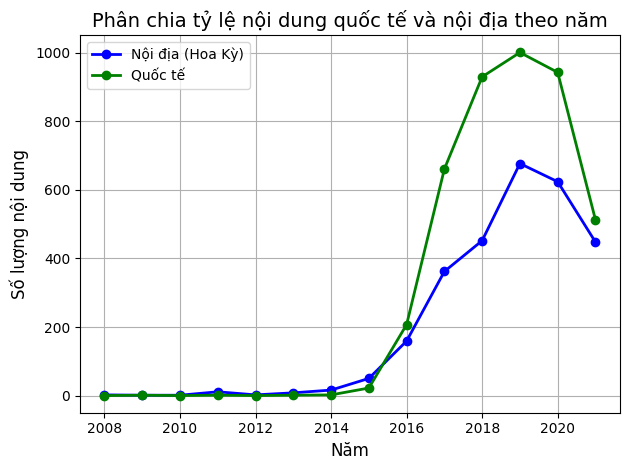

In [11]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
domestic_or_international.plot(kind='line', marker='o', color=['blue', 'green'], linewidth=2)
# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân chia tỷ lệ nội dung quốc tế và nội địa theo năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số lượng nội dung', fontsize=12)
plt.legend(['Nội địa (Hoa Kỳ)', 'Quốc tế'], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

##### **Nhận xét:**
- Theo biểu đồ có thể thấy được xu hướng nội dung nội địa Mỹ và quốc tế theo năm được đăng tải trên Netflix, cụ thể như sau:
    - Giai đoạn từ năm 2008 đến năm 2013, số lượng nội dung được đăng tải trên Netflix hầu như không có được thể hiện bằng đường xấp xỉ 0 cho cả nội dung nội địa Mỹ và quốc tế.
    - Bắt đầu từ năm 2014 thì số lượng nội dung được đăng tải có dấu hiệu tăng dần khi nội dung nội địa Mỹ có số lượng là 16 nội dung. Trong khi nội dung quốc tế vẫn chưa khởi sắc mấy khi số lượng nội dung vẫn chưa có dấu hiệu tăng nào đáng kể.
    - Bước sang năm 2015 thì số lượng nội dung thuộc về cả quốc tế và nội địa Mỹ đã tăng lên một mạnh mẽ đến tận năm 2019. Năm 2019 cũng là đỉnh điểm số lượng nội dung nội địa và quốc tế được đăng tải trên Netflix với hơn 1000 nội dung quốc tế và gần 700 nội dung nội địa Mỹ.
    - Nhưng khi bước sang giai đoạn 2020-2021 thì số lượng nội dung bắt đầu giảm nhưng không quá đáng kể.
    

##### **Kết luận:**

Nội dung nội địa và quốc tế trên Netflix trải qua 3 giai đoạn:
- Giai đoạn 1: Giai đoạn phát triển chậm
    - Từ năm 2008 đến năm 2013, cả về nội địa và quốc tế thì số lượng nội dung được đăng tải đều rất thấp và thậm chí là không có nội dung nào. Có thể do giai đoạn này Netflix chưa thu hút được nhiều người xem hoặc Netflix chưa thực sự phổ biến trên thế giới cũng như ở Mỹ nên số lượng đăng tải cũng không mấy khả quan.
- Giai đoạn 2: Giai đoạn phát triển mạnh mẽ
    - Giai đoạn năm 2014-2019, giai đoạn này số lượng tăng nhanh cả về nội dung nội địa và quốc tế.
- Giai đoạn 3: Giai đoạn suy giảm nhẹ
    - Giai đoạn năm 2020-2021, nhìn chung số lượng nội dung của cả 2 có phần giảm nhẹ hơn so với giai đoạn trước đó.
    
Netflix từ phát triển chậm đã bùng nổ mạnh mẽ, sau đó điều chỉnh để thích ứng với thị trường và các yếu tố ngoại cảnh, duy trì vị thế qua chiến lược chất lượng

#### 1.2. Sự đa dạng hoá nội dung được hợp tác sản xuất qua từng năm:

Ngoài những nội dung nội địa (Chỉ sản xuất tại Mỹ) và quốc tế (Không bao gồm Mỹ) thì còn có những nội dung được kết hợp giữa nội địa và quốc tế. Sau đây là những phân tích cụ thể:

In [12]:
# Chuẩn bị dữ liệu
domestic_and_international = content_distribution_by_year.drop(['Nội địa (Hoa Kỳ)', 'Quốc tế', 'Không xác định'], axis = 1)
domestic_and_international

is_international,Hợp tác
release_year,
2008,0.0
2009,0.0
2010,0.0
2011,1.0
2012,1.0
2013,2.0
2014,6.0
2015,7.0
2016,44.0


##### **Trực quan hoá sự đa dạng nội dung hợp tác quốc tế trên Netflix:**

- Biểu đồ: Barchart.
- Lý do chọn biểu đồ: Biểu đồ cột có thể nhìn thấy rõ sự thay đổi về số lượng nội dung hợp tác quốc tế trên nền tảng Netflix và nó cũng dễ dàng tiếp cận đến được với nhiều người.

<Figure size 1000x600 with 0 Axes>

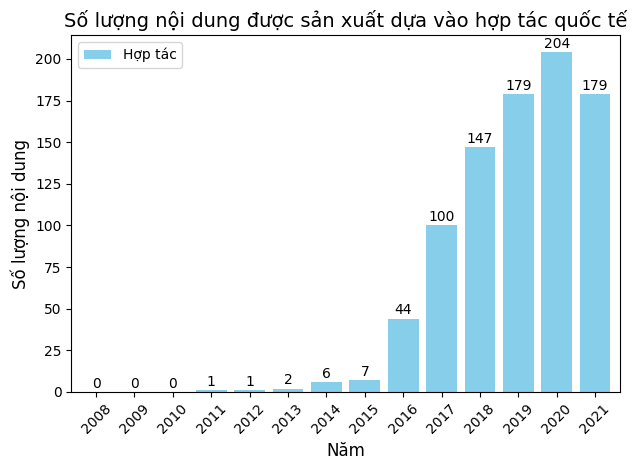

In [13]:
# Trực quan hoá biểu đồ cột
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ cột với màu sắc
ax = domestic_and_international.plot(kind='bar', width = 0.8, color = 'skyblue')
# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Số lượng nội dung được sản xuất dựa vào hợp tác quốc tế', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Số lượng nội dung', fontsize=12)
plt.legend()
# Thêm số lượng lên đầu các cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 1),  # Đặt khoảng cách từ đỉnh cột (tăng khoảng cách nếu cần)
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10, color='black')

# Đảm bảo các nhãn không bị cắt
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### **Nhận xét:**
- Theo như biểu đồ có thể rút ra được những nhận xét cụ thể như sau:
    - Trong giai đoạn 2008-2015, số lượng các bộ phim/chương trình truyền hình hợp tác quốc tế hầu như rất ít hoặc là không được đăng tải quá nhiều trên Netflix, nhiều nhất cũng chỉ là 7 nội dung tại năm 2015.
    - Bước sang năm 2016, có thể thấy nội dung hợp tác quốc tế ngày càng được đăng tải nhiều trên nền tảng Netflix cho thấy được mức độ phát triển và thu hút người xem từ những nội dung này ngày càng tăng mạnh mẽ.
    - Tuy nhiên vào năm 2021, số lượng nội dung này có hơi giảm nhẹ so với với năm trước đó (tức là năm 2020) nhưng cũng không quá đáng kể. Cũng cho thấy mức độ phổ biến ổn định của nội dung này.

#### **Kết luận:**
Nội dung hợp tác quốc tế trải qua 3 giai đoạn:
- Giai đoạn 1: Phát triển chậm
    - Giai đoạn năm 2008-2015, có rất ít nội dung hợp tác quốc tế được đăng tải trên Netflix.
- Giai đoạn 2: Phát triển mạnh mẽ
    - Giai đoạn năm 2016-2020, vào giai đoạn này số lượng nội dung kết hợp quốc tế tăng một cách mạnh mẽ và khác biệt rõ ràng nhất.
- Giai đoạn 3: Giảm nhẹ
    - Sau sự phát triển bùng nổ vào năm 2020, thì nội dung có hơi giảm một ít so với năm trước nhưng cũng không quá đáng kể.

Từ đó rút ra được là sau năm 2015, nội dung hợp tác quốc tế trong lĩnh vực điện ảnh phát triển mạnh mẽ, mở ra nhiều cơ hội tích cực cho các nhà làm phim muốn kết nối và hợp tác với nhiều quốc gia trên thế giới. Sự phát triển này không chỉ diễn ra nhanh chóng mà còn duy trì ổn định trong thời gian dài, minh chứng cho sức hút ngày càng lớn của những tác phẩm hợp tác quốc tế đối với khán giả toàn cầu.

### 2. Các quốc gia có sự gia tăng đáng kể về số lượng nội dung trên Netflix:

- Các bước thực hiện:
    - Bước 1: Tính tổng số nội dung cho từng quốc gia theo từng năm.
    - Bước 2: Lọc ra các quốc gia có số lần tham gia vào để sản xuất nội dung lớn hơn hoặc bằng số lần tham gia trung bình (Nhằm loại bỏ đi những quốc gia quá ít không tăng trưởng gì đáng kể)
    - Bước 3: Trực quan hoá dữ liệu.

In [14]:
country = listed_in_encoded.columns
print (f'Số lượng các quốc gia có tham gia sản xuất nội dung: {country.size}')

Số lượng các quốc gia có tham gia sản xuất nội dung: 122


- Số lượng các quốc gia quá nhiều để có thể trực quan.

In [15]:
# Lấy cột quốc gia và các cột one-hot encoding
df_country_data = df.drop(['type', 'title', 'director', 'country', 'date_added'], axis=1)
# Tính tổng số nội dung cho từng quốc gia theo từng năm
country_year_counts = df_country_data.groupby(['release_year']).sum(numeric_only=True)
country_participation_avg = country_year_counts.sum(axis=0).mean()
countries_above_avg = country_year_counts.sum(axis=0)[country_year_counts.sum(axis=0) >= country_participation_avg].index
filtered_country_year_counts = country_year_counts[countries_above_avg]
filtered_country_year_counts = filtered_country_year_counts.drop(2024) # Do chưa đủ dữ liệu để phân tích

##### **Trực quan hoá quốc gia có sự gia tăng đáng kể về số lượng nội dung trên Netflix:**

- Biểu đồ: Heatmap.
- Lý do chọn biểu đồ: 
    - Heatmap giúp nhận thấy các xu hướng theo thời gian hoặc sự thay đổi về mức độ tham gia của từng quốc gia.
    - Các khu vực có màu sắc đậm hơn thể hiện mức độ sản xuất cao hơn, giúp dễ dàng nhận ra các quốc gia hoặc giai đoạn có sự tăng trưởng nổi bật.
    - Heatmap giúp so sánh số lượng nội dung giữa nhiều quốc gia cùng một lúc.

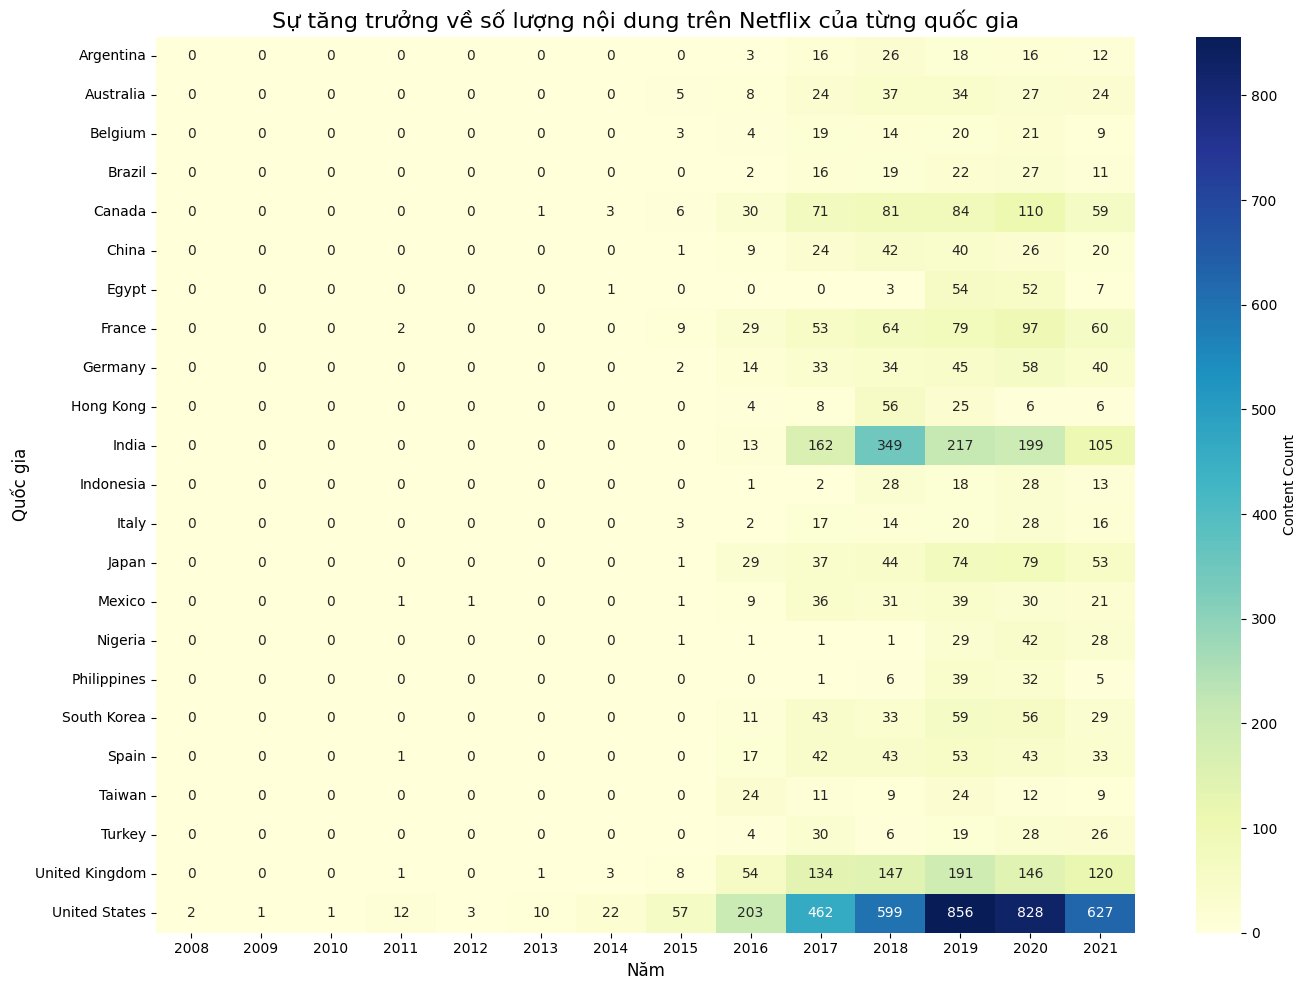

In [16]:
# Chuyển DataFrame thành dạng pivot để dễ dàng vẽ heatmap
heatmap_data = filtered_country_year_counts.T.fillna(0)
# Vẽ heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="YlGnBu", cbar_kws={'label': 'Content Count'})
plt.title('Sự tăng trưởng về số lượng nội dung trên Netflix của từng quốc gia', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#### **Nhận xét:**
- Biểu đồ dữ liệu trên cho thấy sự tăng trưởng đáng chú ý về số lượng nội dung trên Netflix của các quốc gia qua các năm. Cụ thể:
    - Mỹ là quốc gia ghi nhận sự gia tăng mạnh mẽ nhất, đạt đỉnh vào năm 2019 với 856 nội dung được sản xuất và đăng tải.
    - Tiếp theo là Ấn Độ, với mức tăng trưởng ấn tượng và đỉnh điểm vào năm 2018, khi tham gia sản xuất 349 nội dung.
    - Các quốc gia khác như Vương Quốc Anh cũng có sự phát triển nhanh chóng, đặc biệt trong giai đoạn 2016-2017, sau đó ổn định từ năm 2017 đến 2021. Bên cạnh đó, những quốc gia như Canada, Pháp, Nhật Bản cũng đóng góp đáng kể vào sản xuất các nội dung trên nền tảng này.
    
Nhìn chung, giai đoạn sau năm 2016 chứng kiến sự gia tăng mạnh mẽ trong số lượng quốc gia tham gia sản xuất phim và chương trình truyền hình. Đây là kết quả của nhu cầu xem phim trực tuyến gia tăng mạnh mẽ trên toàn cầu, kéo theo sự bùng nổ trong lĩnh vực điện ảnh và truyền hình.

#### **Kết luận:**
Từ những phân tích trên, có thể thấy rõ sự phát triển mạnh mẽ và bền vững của ngành điện ảnh và truyền hình quốc tế, đặc biệt là trên nền tảng Netflix. Sự gia tăng số lượng nội dung sản xuất và đăng tải từ các quốc gia trên thế giới không chỉ phản ánh nhu cầu ngày càng lớn của khán giả đối với các chương trình, bộ phim trực tuyến mà còn cho thấy xu hướng hợp tác quốc tế đang trở thành yếu tố then chốt trong sự phát triển của ngành. Các quốc gia lớn như Mỹ, Ấn Độ và Vương Quốc Anh, cùng với nhiều quốc gia khác, đều đóng góp quan trọng vào việc làm phong phú thêm kho tàng nội dung trên Netflix. Chắc chắn rằng, trong tương lai, sự hợp tác quốc tế sẽ tiếp tục thúc đẩy sự đổi mới và phát triển mạnh mẽ trong ngành công nghiệp giải trí, đồng thời mở rộng cơ hội cho các nhà sản xuất và khán giả toàn cầu.

### 3. Trả lời câu hỏi:

- **Câu hỏi được đặt ra từ đầu:** Xu hướng về sự đa dạng hóa nội dung quốc tế và nội dung nội địa của Netflix là gì?
- **Câu trả lời:**
    - Thông qua những phân tích trên, có thể thấy rõ sự phát triển vượt bậc và sự mở rộng đa dạng về nội dung quốc tế và nội địa trên Netflix. Sự phát triển này không chỉ phản ánh chiến lược mở rộng thị trường mà còn thể hiện nỗ lực không ngừng của Netflix trong việc đáp ứng thị hiếu ngày càng đa dạng của khán giả toàn cầu.
    - Trong những giai đoạn đầu, sự phong phú về nội dung từ các quốc gia còn khá hạn chế và chưa thực sự rõ nét. Tuy nhiên, kể từ năm 2016 đến 2021, lượng nội dung được đăng tải trên Netflix đã gia tăng mạnh mẽ. Các quốc gia như Mỹ, Ấn Độ, Vương Quốc Anh, Nhật Bản, và nhiều quốc gia khác đã tích cực tham gia sản xuất và đóng góp vào kho tàng nội dung phong phú trên nền tảng này. Những bộ phim và chương trình từ nhiều nền văn hóa khác nhau không chỉ mang đến sự mới lạ mà còn tạo ra một làn sóng giao lưu văn hóa sâu sắc trong cộng đồng khán giả quốc tế.
    - Mặc dù vào năm 2021, dịch bệnh COVID-19 đã ảnh hưởng đáng kể đến hoạt động sản xuất phim toàn cầu, khiến nhiều dự án bị trì hoãn hoặc hủy bỏ, nhưng sự sụt giảm trong lượng nội dung mới trên Netflix là không quá lớn. Điều này cho thấy sự linh hoạt và khả năng thích ứng của Netflix trong bối cảnh khó khăn. Nền tảng này vẫn duy trì được nguồn cung nội dung ổn định nhờ vào sự hợp tác quốc tế và việc phát hành các nội dung đã được sản xuất từ trước đó.
    - Từ đây, có thể nhận thấy Netflix đã thực hiện một bước chuyển mình ấn tượng trong việc đa dạng hóa nội dung, mở rộng phạm vi từ các sản phẩm giải trí nội địa đến những tác phẩm quốc tế. Điều này không chỉ giúp Netflix củng cố vị thế là một nền tảng giải trí hàng đầu mà còn tạo ra cơ hội để khán giả trên khắp thế giới tiếp cận với những bộ phim và chương trình chất lượng từ nhiều nền văn hóa khác nhau. Xu hướng này hứa hẹn sẽ tiếp tục phát triển mạnh mẽ trong tương lai, thúc đẩy sự sáng tạo và đổi mới không ngừng trong ngành công nghiệp điện ảnh và truyền hình toàn cầu.